# Final Project Submission for Mod 3


* Student name: **Andrew Hotchkiss**
* Student pace: **Part time**
* Scheduled project review date/time: 
* Instructor name: **James Irving**
* Blog post URL: https://stones-1130.github.io/


## TABLE OF CONTENTS 

*Click to jump to matching Markdown Header.*<br><br>

<font size=3rem>
    
- **[Introduction](#INTRODUCTION)<br>**
- **[OBTAIN](#OBTAIN)**<br>
- **[SCRUB](#SCRUB)**<br>
- **[EXPLORE](#EXPLORE)**<br>
- **[MODEL](#MODEL)**<br>
- **[iNTERPRET](#iNTERPRET)**<br>
- **[Conclusions/Recommendations](#CONCLUSIONS-&-RECOMMENDATIONS)<br>**
</font>
___

# INTRODUCTION

> **Assignment:** 
> - *What are the top five best zip codes to invest in?* 
> - *Define what "best" means first, then figure out what data I need..*

> This is concept is typically called **"customer churn"**, defined as the proportion of contractual customers or subscribers who leave a supplier during a given time period. It is a possible indicator of customer dissatisfaction, cheaper and/or better offers from the competition, more successful sales and/or marketing by the competition, or reasons having to do with the customer life cycle.

source: https://en.wikipedia.org/wiki/Churn_rate




# OBTAIN

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('customer_churn.csv')
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


> **Data Dictionary:**

**state: the state the user lives in**

**account length: the number of days the user has had this account**

**area code: the user's three-digit telephone area code** 

**phone number: the user's phone number**

**international plan: true if the user has the 
international plan, otherwise false**

**voice mail plan: true if the user has the voice mail plan, otherwise false**

**number vmail messages: the number of voice mail messages the user has in their inbox**

**total day minutes: the user's total number of call minutes during the day**

**total day calls: the user's total number of calls during the day**

**total day charge: total amount of money the user was charged by SyriaTel for calls during the day**

**total eve minutes: the user's total number of call minutes during the evening**

**total eve calls: the user's total number of calls during the evening**

**total eve charge: total amount of money the user was charged by SyriaTel for calls during the evening**

**total night minutes: the user's total number of call minutes during the night**

**total night calls: the user's total number of calls during the night**

**total night charge: total amount of money the user was charged by SyriaTel for calls during the night**

**total intl minutes: the user's total number of call minutes from international calls**

**total intl calls: the user's total number of international calls**

**total intl charge: total amount of money the user was charged by SyriaTel for international calls**

**customer service calls: the user's total number of customer service calls**

**churn: true if the user terminated their contract with SyriaTel, otherwise false**

source: https://www.kaggle.com/ambpro/dealing-with-unbalance-eda-pca-smote-lr-svm-dt-rf

# EXPLORE

In [3]:
#EXAMINE THE DATA TYPES, ALSO LOOK FOR MISSING DATA

display(df.info(), df.describe(), df.isna().sum(), df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
state                     3333 non-null object
account length            3333 non-null int64
area code                 3333 non-null int64
phone number              3333 non-null object
international plan        3333 non-null object
voice mail plan           3333 non-null object
number vmail messages     3333 non-null int64
total day minutes         3333 non-null float64
total day calls           3333 non-null int64
total day charge          3333 non-null float64
total eve minutes         3333 non-null float64
total eve calls           3333 non-null int64
total eve charge          3333 non-null float64
total night minutes       3333 non-null float64
total night calls         3333 non-null int64
total night charge        3333 non-null float64
total intl minutes        3333 non-null float64
total intl calls          3333 non-null int64
total intl charge         3333 non-null float64

None

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

(3333, 21)

> **Initial thoughts about the data:**
> - No null values
> - Need to either deal with the "-" in the phone number or just remove the column
> - Scaling will be important
> - Encoding for the categorial (object) columns: **state, international plan, voicemail plan**


### CHURN FEATURE ANALYSIS

> **Before we progress with our OESMN process, let's take a close look at our target feature "churn." Specifially, let's check out:**
> - **"churn" class balance**
> - **See if "churn" is visibly correlated with other feature columns.**

,churn
False,2850
True,483


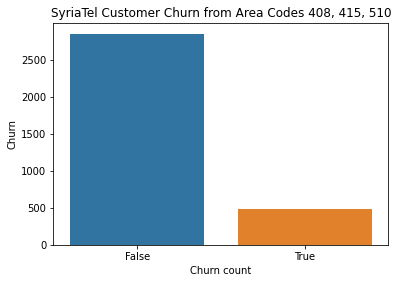

In [293]:
#ANALYZE POSSIBLE "churn" CLASS IMBALANCE ISSUES
#Code inspired by: https://www.kaggle.com/sandipdatta/customer-churn-analysis

target = df['churn'].value_counts()
sns.barplot(target.index, target.values).set_title("SyriaTel Customer Churn from Area Codes 408, 415, 510")
plt.xlabel('Churn count')
plt.ylabel('Churn')

churn_count = pd.DataFrame(target)
display(churn_count)

In [5]:
df['churn'].value_counts(normalize=True)

False    0.855086
True     0.144914
Name: churn, dtype: float64

> **This indicates that we're going to have class imbalance issues, due to the fact that we have significantly more customers that did not cancel their plans (False) compared to those that did (True)**

> **Our true customer "churn" percentage is 14% for this data set.**

> **Is the number of "customer service calls" correlated with "churn"? Logically, it could be assumed that a user with more calls to customer service would be at an increased chance of canceling their account with SyriaTel.**

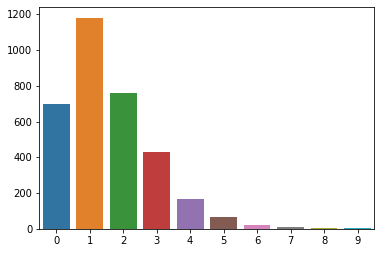

In [294]:
#RAW NUMBER OF CUSTOMER SERVICE CALLS
y = df['customer service calls'].value_counts()

sns.barplot(y.index, y.values);

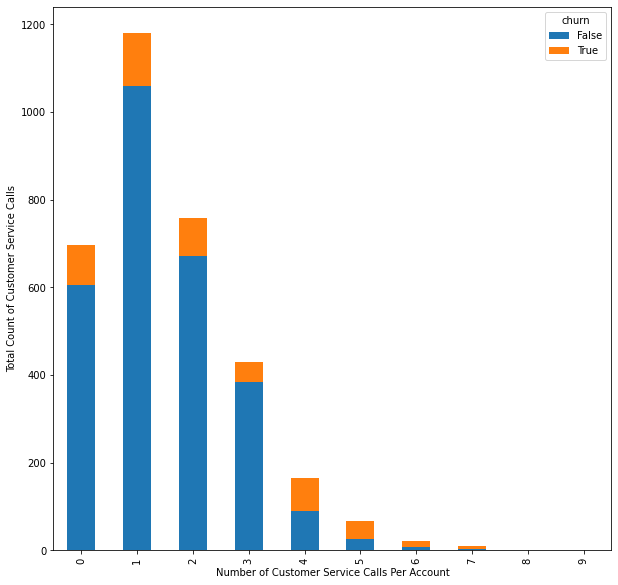

In [7]:
#NUMBER OF USER CUSTOMER SERVICE CALLS AND ASSOCIATED CHURN
#CODE ADAPTED FROM: https://www.kaggle.com/sandipdatta/customer-churn-analysis

ax = df.groupby(["customer service calls", "churn"]).size().unstack().plot(kind="bar",
                                                                      stacked=True, figsize=(10,10));
                                                                           
plt.xlabel("Number of Customer Service Calls Per Account")
plt.ylabel("Total Count of Customer Service Calls")
plt.show()

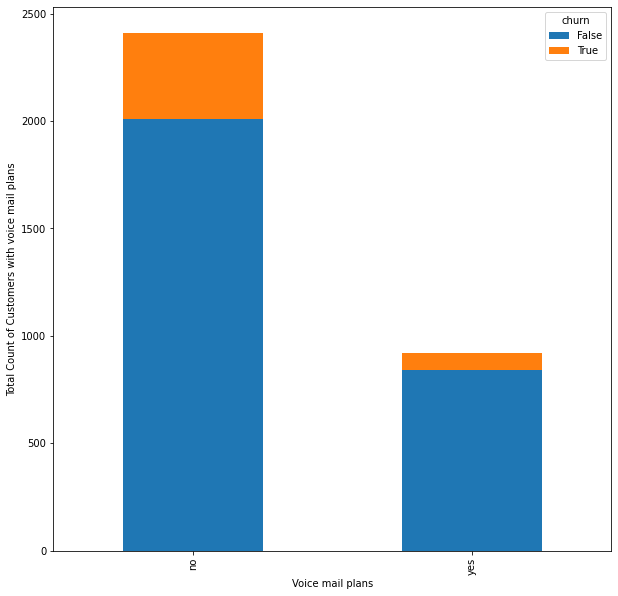

In [8]:
ax = df.groupby(["voice mail plan", "churn"]).size().unstack().plot(kind="bar",
                                                                      stacked=True, figsize=(10,10));
                                                                           
plt.xlabel("Voice mail plans")
plt.ylabel("Total Count of Customers with voice mail plans")
plt.show()

In [24]:
#TAKE A MORE DETAILED LOOK AT HOW CUSTOMER SERVICE CALLS CORRELATE TO CHURN

cust_svc_churn = df.groupby(["customer service calls", "churn"]).size()
cs_df = pd.DataFrame(cust_svc_churn)
display(cs_df)

0
customer service calls churn      
0                      False   605
                       True     92
1                      False  1059
                       True    122
2                      False   672
                       True     87
3                      False   385
                       True     44
4                      False    90
                       True     76
5                      False    26
                       True     40
6                      False     8
                       True     14
7                      False     4
                       True      5
8                      False     1
                       True      1
9                      True      2

In [296]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

posx and posy should be finite values
posx and posy should be finite values


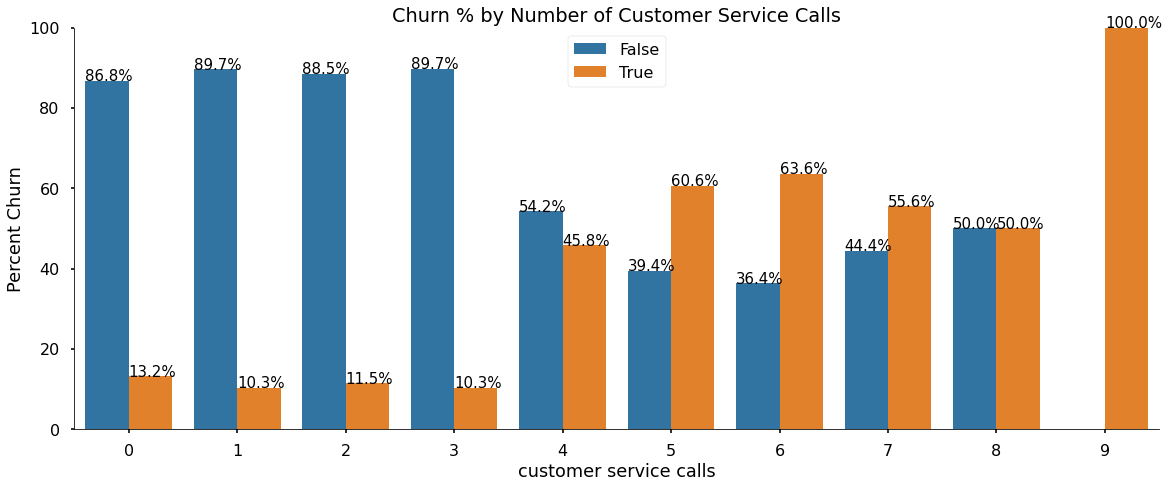

In [301]:
#USE A "WITH" STATEMENT TO TRY OUT DIFFERENT STYLES OF PLOTS
#ONLY THE PLOT INDENTED UNDER THE "WITH" STATEMENT USES THE SEABORN STYLE

with plt.style.context("seaborn-poster"):
    '''Plot customer churn % against number of customer service calls
    #CODE CITATION: https://stackoverflow.com/questions/34615854/seaborn-countplot-with-normalized-y-axis-per-group
    '''
    
    x,y = 'customer service calls', 'churn'

    df1 = df.groupby(x)[y].value_counts(normalize=True)
    df1 = df1.mul(100)
    df1 = df1.rename('Percent Churn').reset_index()

    g = sns.catplot(x=x, y='Percent Churn', hue=y, kind='bar', data=df1, legend_out=False)
    g.fig.set_size_inches(20, 7)
    g.ax.set_title('Churn % by Number of Customer Service Calls')
    g.ax.set_xlabel(x)
    g.ax.set_ylabel('Percent Churn')
    g.ax.legend(loc='upper center')
    g.ax.set_ylim(0,100)


    #PRINT CHURN PERCENTAGE ON CAT PLOT
    for p in g.ax.patches:
        txt = str(p.get_height().round(1)) + '%'
        txt_x = p.get_x() 
        txt_y = p.get_height()
        g.ax.text(txt_x, txt_y, txt, fontdict={'fontsize': 15})

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


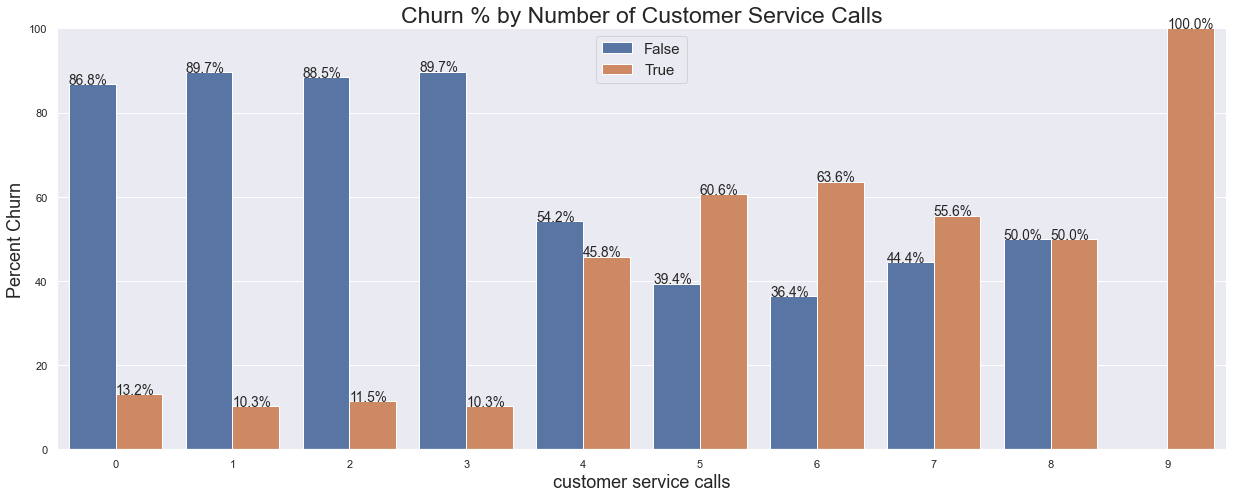

In [101]:
#VISUALIZE CUSTOMER CHURN
#Code inspired by: https://stackoverflow.com/questions/34615854/seaborn-countplot-with-normalized-y-axis-per-group

x,y = 'customer service calls', 'churn'

df1 = df.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('Percent Churn').reset_index()

g = sns.catplot(x=x, y='Percent Churn', hue=y, kind='bar', data=df1, legend_out=False)
g.fig.set_size_inches(20, 7)
g.ax.set_title('Churn % by Number of Customer Service Calls', 
              fontdict={'fontsize': 23})
g.ax.set_xlabel(x, fontdict={'fontsize': 18})
g.ax.set_ylabel('Percent Churn', fontdict={'fontsize': 18})
g.ax.legend(loc='upper center', fontsize=15)
sns.set(font_scale=1.15)
g.ax.set_ylim(0,100)


#PRINT CHURN PERCENTAGE ON CAT PLOT
for p in g.ax.patches:
    txt = str(p.get_height().round(1)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x, txt_y, txt)

> - **There's a clear correlation between an increase and customer service calls and a higher chance of customer churn.**

# SCRUB

> **Now let's start preparing our data for use in machine learning models.**

In [9]:
#MAKE A COPY OF THE DATAFRAME
df_1 = df.copy()
df_1.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


> **Since the "phone number" column only contains discrete data that doesn't have any meaning (other than serving as an account ID) we should drop it before proceeding.**

In [10]:
#DROP PHONE NUMBER COLUMN
df_1.drop('phone number', axis=1, inplace=True)

df_1.head()

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


> **Let's take a closer look at the numerical columns to see if we're going to need to do some scaling later.**

In [ ]:
df.select_dtypes(include=numerics)

df.select_dtypes(include=[np.number])

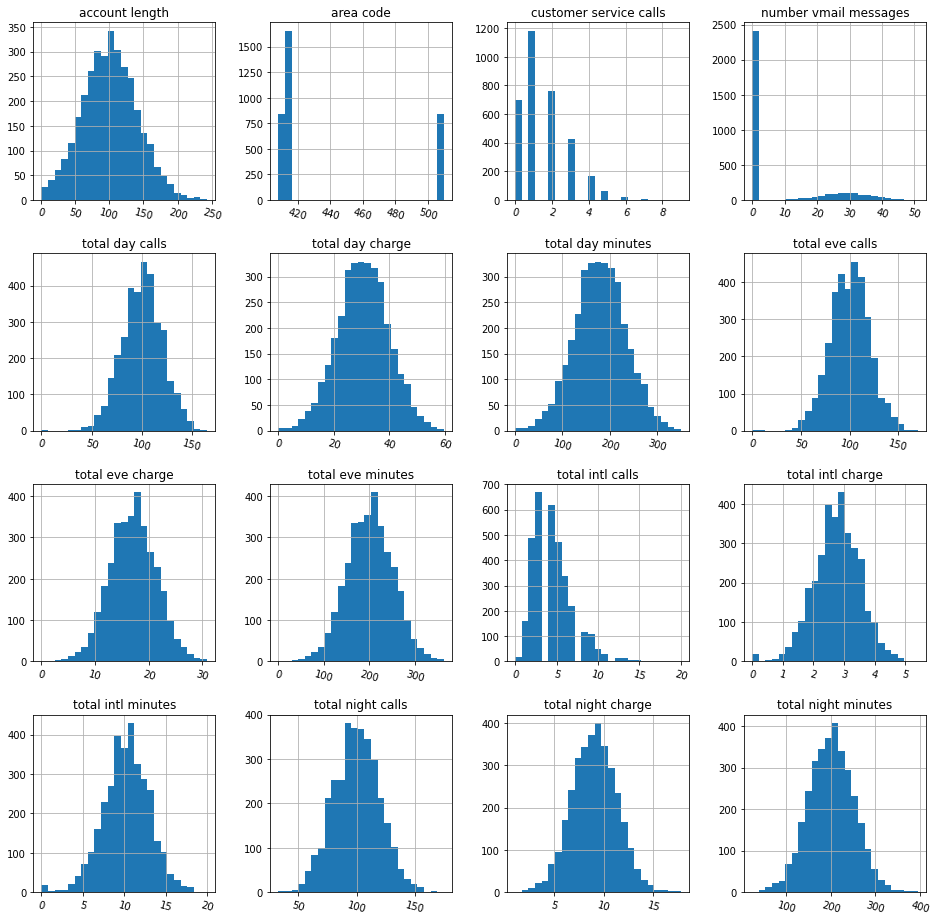

In [21]:
#DISPLAY HISTOGRAMS OF THE NUMERIC FEATURE COLUMNS
def feature_view(df):
    '''Displays individual histograms of all numeric features'''
    columns = list(df.select_dtypes(include=[np.number]).columns.values)
    df[columns].hist(bins=25,figsize=(16,16),xlabelsize='10',ylabelsize='10',xrot=-15)

feature_view(df)

> **We will definitely need to scale our numerical feature columns before we train our models. As you can see above, "account length", "customer service calls", and voicemail messages have significantly different magnitudes.**

> **Now let's take a look at some of our categorical feature columns to see if we'll need to do any preprocessing before using them to train our models.**

In [22]:
#TAKE A CLOSER LOOK AT AREA CODE
print(df_1['area code'].unique())
print(df_1['area code'].value_counts())

[415 408 510]
415    1655
510     840
408     838
Name: area code, dtype: int64


> **While it's great that the area code data is essentially "pre-binned" for us, it also means that the area codes (415, 510, 408) are *nominal variables* - meaning that they are discrete values with no relationship between them.**

> **If we passed the raw area code data into our model, there's a chance that the algorithm would assume a "natural ordering" between the three categories resulting in poor or unexpected modeling results.** 

> **In other words, the algorithm could assume a relationship or ranking between the numbers "415" and "510", when all they do is specify an area code.**

> **In this case, Scikit Learn's One Hot Encoding feature will most likely perform best, because it provides each category with a unique combination of binary variables.**

Citation: https://machinelearningmastery.com/one-hot-encoding-for-categorical-data/



> **Now let's look at a situation where the numerical values actually have meaning, i.e. a relationship or ranking between them.**

In [23]:
#LOOK AT NUMBER OF CUSTOMER SERVICE CALLS
print(df_1['customer service calls'].unique())
print(df_1['customer service calls'].value_counts())

[1 0 2 3 4 5 7 9 6 8]
1    1181
2     759
0     697
3     429
4     166
5      66
6      22
7       9
9       2
8       2
Name: customer service calls, dtype: int64


> - **Since the numerical value actually has meaning here, we're not going to one-hot-encode this column in order to preserve the relationship.**

> **It's clear that after 4 calls to customer service  "churn" increases dramatically. However, it's important to note that the amount of observations decreases significantly after 3 customer service calls.** 

> **For example, there are only 2 total customers that called customer service 8 times- one canceled their contract, and one did not.**

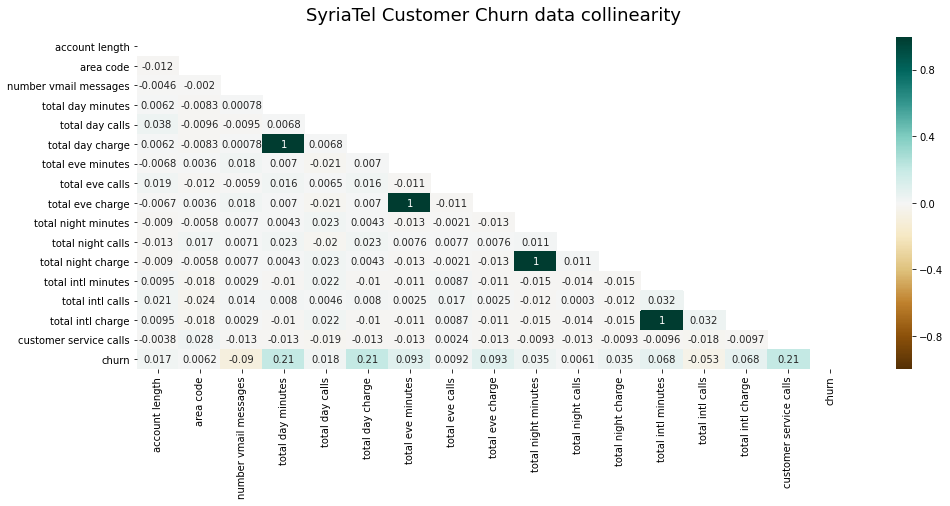

In [290]:
#CHECK FOR MULTI-COLLINEARITY
#CODE FROM: https://medium.com/@szabo.bibor/how-to-create-a-seaborn-correlation-heatmap-in-python-834c0686b88e

plt.figure(figsize=(16, 6))
mask = np.triu(np.ones_like(df.corr(), dtype=np.bool))
heatmap = sns.heatmap(df.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('SyriaTel Customer Churn data collinearity', fontdict={'fontsize':18}, pad=16);

> **Looks like we multi-collinearity between the following features:**
> - total day charge <> total day minutes
> - total eve charge <> total eve minutes
> - total night charge <> total night minutes
> - total intl charge <> total intl minutes

> **Should we be concerned about the multicollinearity we uncovered above? The short answer is no. See below for a more in-depth explanation:**

> **Since we're using classification to try and predict customer churn, we're focused on maximizing our model's prediction accuracy.**

> **To maximize prediction accuracy, we need to include as many feature columns as possible, maximizing the amount of training data we feed our model.**

> **The trade off is a lower confidence on feature importance interpretation. We won't be able to say with 100% certainty "that the feature with the 'biggest weight' is 'the most important' when the features are correlated."**

Citation: https://www.researchgate.net/post/Are_Random_Forests_affected_by_multi-collinearity_between_features

# MODEL

In [ ]:
#Lead with a logistic regression model before RandomForest
#Helps to show superiority of the RandomForest...and important to understand how to use

> **Model selection thought process:**
> - After exploring the data, we can see that even after preprocessing we'll have data with class imbalance and multicollinearity issues that will effect our model's prediction accuracy. In other words, because our target variable ("churn") has way more "False" entries, our model will probably be great at predicting when a customer will stay with SyriaTel, but not great at predicting if they are going to cancel their contract ("churn" = "True"). 

> - Since we want to focus on identifying the customers who are likely to cancel their contract, we need to pick a model that can deal with the above mentioned issues. 

> - Scikit Learn's **RandomForest** model does a good job of dealing with class imbalance and multicollinearity by using a combination of bagging and random sampling to create more decision trees during the modeling process. 

> - More trees and more/random sampling will lessen the effects of multicollinearity and class imbalance,  improving our model's prediction accuracy. 

#### IMPORT LIBRARIES AND PACKAGES

In [240]:
#IMPORT SKLEARN MODULES FOR PRE-PROCESSING
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, RobustScaler
from sklearn.compose import ColumnTransformer, make_column_transformer, make_column_selector
from sklearn.feature_selection import VarianceThreshold
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import plot_confusion_matrix, roc_curve, auc, make_scorer, recall_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import set_config
set_config(display="diagram")
import warnings
warnings.filterwarnings("ignore")

#### IMPORT THE DATA AND TRAIN AND TEST SPLIT

In [241]:
#IMPORT DATA
df = pd.read_csv('customer_churn.csv')
df_2 = df.copy()

In [242]:
#TRAIN_TEST SPLIT
X = df_2.drop(['churn'], axis=1)
y = df_2['churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print("Train_test_split: ", X_train.shape, X_test.shape)

Train_test_split:  (2333, 20) (1000, 20)


#### ONE HOT ENCODE CATEGORICAL DATA

In [243]:
#CATEGORICAL TRANSFORMER
cat_cols = ['international plan', 'area code', 'voice mail plan']
cat_transformer = Pipeline(steps=[
    ('ohe', OneHotEncoder(sparse=False, handle_unknown='error'))])

#### SCALE DISCRETE NUMERICAL DATA

In [244]:
#NUMERICAL TRANSFORMER
num_cols = list(X_train.select_dtypes(include=[np.number]).columns.values)
num_transformer = Pipeline(steps=[
    ('rbs', RobustScaler())])

preprocessor = ColumnTransformer(
                    transformers=[
                        ('cat', cat_transformer, cat_cols),
                        ('num', num_transformer, num_cols)])

#### BUILD PIPELINE

In [245]:
#BUILD PIPELINE WITH LOGISTIC REGRESSION AS BASELINE CLASSIFIER
pipe_base = Pipeline(steps=[
    ("preprocessing", preprocessor), 
    ("log_clf", LogisticRegression())])

#VISUALIZE OUR PIPELINE
pipe_base

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(sparse=False))]),
                                                  ['international plan',
                                                   'area code',
                                                   'voice mail plan']),
                                                 ('num',
                                                  Pipeline(steps=[('rbs',
                                                                   RobustScaler())]),
                                                  ['account length',
                                                   'area code',
                                                   'number vmail messages',
                                                   'total day minutes',
                                                   'total day calls',
                                                   'total day charge',
                                                   'total eve minutes',
                                                   'total eve calls',
                                                   'total eve charge',
                                                   'total night minutes',
                                                   'total night calls',
                                                   'total night charge',
                                                   'total intl minutes',
                                                   'total intl calls',
                                                   'total intl charge',
                                                   'customer service '
                                                   'calls'])])),
                ('log_clf', LogisticRegression())])

In [247]:
#FIT THE LOGISTIC REGRESSION MODEL TO THE TRAINING DATA
log_clf = pipe_base.fit(X_train, y_train)

In [302]:
#BUILD FUNCTION TO VISUALIZE MODEL ASSESSMENT 

def model_assessment(model, X_test, y_test):
    '''Print out model performance metrics'''
    
    #FINAL MODEL SCORE
    print(f"Final Model Score: {model.score(X_test, y_test):.2%}", "\n")
    
    #CLASSIFICATION REPORT
    pred = model.predict(X_test)
    print("Classification report: ", "\n", classification_report(y_test, pred))
    
    #VISUALIZE CONFUSION MATRIX
    fig, ax = plt.subplots(figsize=(10,4),ncols=2)
    plot_confusion_matrix(model, X_test, y_test,cmap="Blues", ax=ax[0], normalize="true")

    ax[0].set(title='Confusion Matrix')
    y_score = model.predict_proba(X_test)[:,1]
    fpr,tpr,thresh = roc_curve(y_test,y_score)

    #PLOT AND VISUALIZE ROC CURVE
    roc_auc = round(auc(fpr, tpr), 3)
    ax[1].plot(fpr,tpr,color='darkorange',label=f'AUC={roc_auc}')
    ax[1].plot([0,1],[0,1],ls=':')
    ax[1].legend()
    ax[1].grid()
    ax[1].set(ylabel='True Positive Rate',xlabel='False Positive Rate',
            title='Receiver operating characteristic (ROC) Curve')
    plt.tight_layout()
    sns.reset_defaults()
    plt.show()

Final Model Score: 86.50% 

Classification report:  
               precision    recall  f1-score   support

       False       0.88      0.97      0.93       857
        True       0.57      0.22      0.32       143

    accuracy                           0.86      1000
   macro avg       0.73      0.60      0.62      1000
weighted avg       0.84      0.86      0.84      1000



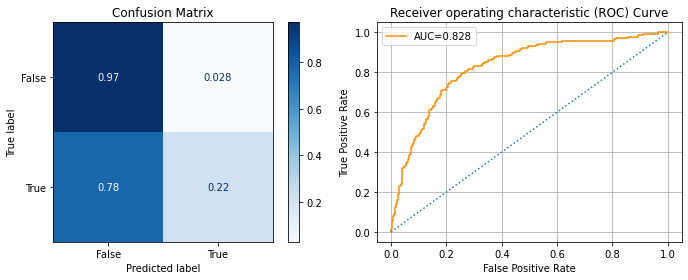

In [304]:
#EVALUATE LOGISTIC REGRESSION BASE MODEL PREDICTIONS USING TEST DATA

model_assessment(log_clf, X_test, y_test)

In [246]:
#BUILD PIPELINE WITH RANDOM FOREST CLASSIFIER
pipe = Pipeline(steps=[
    ("preprocessing", preprocessor), 
    ("rf_clf", RandomForestClassifier())])

#VISUALIZE OUR PIPELINE
pipe

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(sparse=False))]),
                                                  ['international plan',
                                                   'area code',
                                                   'voice mail plan']),
                                                 ('num',
                                                  Pipeline(steps=[('rbs',
                                                                   RobustScaler())]),
                                                  ['account length',
                                                   'area code',
                                                   'number vmail messages',
                                                   'total day minutes',
                                                   'total day calls',
                                                   'total day charge',
                                                   'total eve minutes',
                                                   'total eve calls',
                                                   'total eve charge',
                                                   'total night minutes',
                                                   'total night calls',
                                                   'total night charge',
                                                   'total intl minutes',
                                                   'total intl calls',
                                                   'total intl charge',
                                                   'customer service '
                                                   'calls'])])),
                ('rf_clf', RandomForestClassifier())])

#### FIT CLASSIFIER

In [248]:
#FIT RANDOM FOREST CLASSIFIER TO THE TRAINING DATA
rf_clf = pipe.fit(X_train, y_train)

> **Before we check out how our models do, let's take a look at the class imbalances in our target feature for both our testing and training data, to make sure that there aren't significant differences that could affect model performance.**

In [205]:
#VALUE COUNTS FOR TRAINING AND TEST TARGET COLUMN ("CHURN")

def tgt_class_imbalance(y_test, y_train):

    '''Visualize target variable class imbalance for test and train data'''
    
    #CREATE SUBPLOTS
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20,10))
    
    
    #CHANGE "y_test" NUMPY ARRAY INTO A PANDAS DATAFRAME
    y_test_df = pd.DataFrame(y_test)

    #ADD AN INDEX
    y_test_df.index = [x for x in range(0, len(y_test_df.values))]

    #PLOT VALUE COUNTS
    y_test_count = y_test_df['churn'].value_counts(normalize=True)

    sns.barplot(x=y_test_count.index, y=y_test_count.values, ax=ax1)

    ax1.set_title("Class Imbalance in Target Value TESTING Data", fontdict={'fontsize': 15})
    ax1.set_xlabel("Testing Data 'Churn'", fontdict={'fontsize': 15})
    
    ax1.set_ylabel("% of Test Data", fontdict={'fontsize': 15});
    
    
    #CHANGE "y_train" NUMPY ARRAY INTO A PANDAS DATAFRAME
    y_train_df = pd.DataFrame(y_train)

    #ADD AN INDEX
    y_train_df.index = [x for x in range(0, len(y_train_df.values))]

    #PLOT VALUE COUNTS
    y_train_count = y_train_df['churn'].value_counts(normalize=True)

    sns.barplot(x=y_train_count.index, y=y_train_count.values, ax=ax2)

    ax2.set_title("Class Imbalance in Target Value TRAINING Data", fontdict={'fontsize': 15})
    ax2.set_xlabel("Training Data 'Churn'", fontdict={'fontsize': 15})
    ax2.set_ylabel("% of Train Data", fontdict={'fontsize': 15});

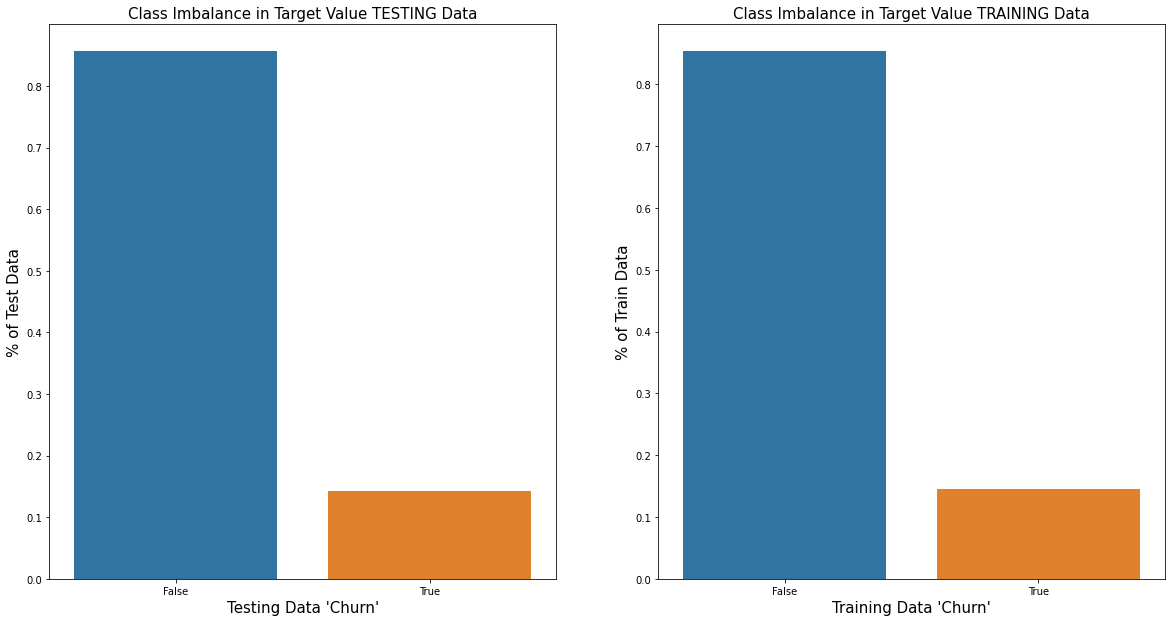

In [206]:
tgt_class_imbalance(y_test, y_train)

> **OK, looks like there is not a significant difference between our test and train target feature.**

#### VISUALIZE MODEL PERFORMANCE AND PREDICTION ACCURACY

Final Model Score: 95.00% 

Classification report:  
               precision    recall  f1-score   support

       False       0.95      1.00      0.97       857
        True       0.99      0.66      0.79       143

    accuracy                           0.95      1000
   macro avg       0.97      0.83      0.88      1000
weighted avg       0.95      0.95      0.95      1000



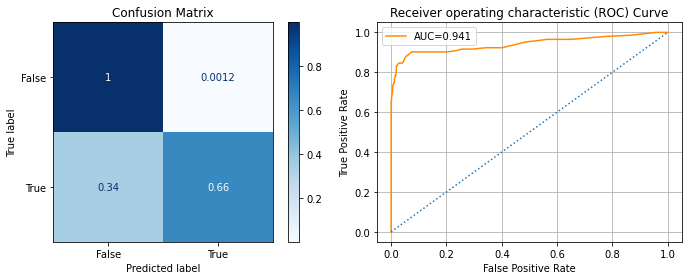

In [303]:
#EVALUATE RANDOM FOREST MODEL PREDICTIONS USING TEST DATA

model_assessment(rf_clf, X_test, y_test)

> **Our LogisticRegression baseline model did significantly worse than our RandomForest model.**
> - LogisticRegression Final Score: 87%
> - RandomForest: 95%

> **However, our RandomForest classifier leaves some things to be desired:**

> - **Just as we expected, our RandomForest did almost perfect classifying False events (meaning the customer did not cancel their phone plan). We can tell this from the normalized score of "1" for True Negative quadrant of the confusion matrix.**

> - **However, it only correctly predicted 65% of the time that the customer would cancel their plan (i.e. a "True" value for "churn"), which is what we really care about! This is also referred to as the True Positive rate or "Recall" score.**

> **Our next step will be to tune our RandomForest classifier to maximize our Recall score to predict which customers are most likely to cancel their contract.**

#### FEATURE IMPORTANCE ANALYSIS

In [228]:
#LET'S LOOK AT FEATURE IMPORTANCE

import eli5

def ft_importance(model):
    '''Print out model feature importance
    CODE CITATION: https://towardsdatascience.com/extracting-feature-importances-from-scikit-learn-pipelines-18c79b4ae09a
    '''
    onehot_columns = list(
        pipe.named_steps['preprocessing'].named_transformers_['cat'].named_steps['ohe'].get_feature_names(
            input_features=cat_cols))

    numeric_features_list = list(num_cols)
    numeric_features_list.extend(onehot_columns)

    return eli5.explain_weights(pipe.named_steps[model], top=50, feature_names=numeric_features_list)
                            

In [229]:
ft_importance('rf_clf')

Weight,Feature
0.1325 ± 0.1219,total intl minutes
0.1307 ± 0.1386,total night calls
0.1103 ± 0.0501,voice mail plan_yes
0.0643 ± 0.0474,customer service calls
0.0590 ± 0.0430,total intl calls
0.0539 ± 0.0817,account length
0.0532 ± 0.0571,area code_510
0.0484 ± 0.0482,area code_415
0.0467 ± 0.0528,voice mail plan_no
0.0372 ± 0.0747,area code


> - **Our classifier decided that "total intl minutes" was the most important feature to use during classification.**

> - **Remember that we have to take feature importance in trees with a grain of salt due to the multicollinearity issues we discovered during the exploration phase.**

> - **Later on we'll explore using permutation importance which will give us a better understanding of which features are more important to our model's predictions.**

### GRIDSEARCHCV TO FIND BEST RANDOM FOREST HYPERPARAMETERS

#### CREATE PARAMETER GRID

In [230]:
param_grid = {
    'rf_clf__n_estimators': [500, 700, 1000],
    'rf_clf__criterion': ['gini', 'entropy'],
    'rf_clf__class_weight': ['balanced', 'balanced_subsample'],
    'rf_clf__max_depth': [None, 5, 10, 15]
}

#### CREATE SCORER DICTIONARY FOR RECALL SCORE

> - **In order to maximize our Recall score, we need to tell GridSearchCV to pick the best parameters based on the model's Recall score. The default scoring metric is overall accuracy, which we're less concerned about.**

> - **Remember, we want to be able to predict who is planning to cancel their plan!**

In [231]:
scorers = {
    'recall_score': make_scorer(recall_score),
}

#All you have to say in your Gridsearch is say scoring="recall"
#Look at slack message and documentation

#### INSTANTIATE GRIDSEARCH AND FIT MODEL

In [232]:
#INSTANTIATE GRIDSEARCHCV, OPTIMIZING FOR RECALL (TRUE POSITIVES)
rf_grid_search = GridSearchCV(rf_clf, param_grid, scoring=scorers, refit='recall_score', 
                              cv=5, return_train_score=True)

#FIT GRIDSEARCH MODEL TO TRAINING DATA
rf_grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(transformers=[('cat',
                                                                         Pipeline(steps=[('ohe',
                                                                                          OneHotEncoder(sparse=False))]),
                                                                         ['international '
                                                                          'plan',
                                                                          'area '
                                                                          'code',
                                                                          'voice '
                                                                          'mail '
                                                                          'plan']),
                                                                        ('num',
                                                                         Pipeline(steps=[('rbs',
                                                                                          RobustScaler())]),
                                                                         ['account '
                                                                          'length',
                                                                          'area '
                                                                          'code',
                                                                          'number '
                                                                          'vmail '
                                                                          'messages',
                                                                          'total '
                                                                          'day '
                                                                          'minutes',
                                                                          'total '
                                                                          'da...
                                                                          'charge',
                                                                          'customer '
                                                                          'service '
                                                                          'calls'])])),
                                       ('rf_clf', RandomForestClassifier())]),
             param_grid={'rf_clf__class_weight': ['balanced',
                                                  'balanced_subsample'],
                         'rf_clf__criterion': ['gini', 'entropy'],
                         'rf_clf__max_depth': [None, 5, 10, 15],
                         'rf_clf__n_estimators': [500, 700, 1000]},
             refit='recall_score', return_train_score=True,
             scoring={'recall_score': make_scorer(recall_score)})

# iNTERPRET

#### EVALUATE GRIDSEARCH RESULTS

In [236]:
#ANALYZE OUR GRIDSEARCH MODEL TRAINING PERFORMANCE

gs_train_score = np.mean(rf_grid_search.cv_results_['mean_train_recall_score'])

print(f"Mean Training Score: {gs_train_score :.2%}")
print("")
print(f"Best Training Recall Score: {rf_grid_search.best_score_ :.2%}")
print("")
print(f"Optimal Parameter for Best Recall: {rf_grid_search.best_params_}")

Mean Training Score: 93.44%

Best Training Recall Score: 78.24%

Optimal Parameter for Best Recall: {'rf_clf__class_weight': 'balanced_subsample', 'rf_clf__criterion': 'entropy', 'rf_clf__max_depth': 5, 'rf_clf__n_estimators': 500}


> **After GridSearch, our average training score was almost identical to our original Random Forest Model, but our Recall score increased 8%!**

> **The optimal parameters were also printed out for viewing above.**

#### EVALUATE GRIDSEARCH'S PREDICTIONS

Final Model Score: 88.81% 

Classification report:  
               precision    recall  f1-score   support

       False       0.98      0.98      0.98       857
        True       0.90      0.89      0.89       143

    accuracy                           0.97      1000
   macro avg       0.94      0.94      0.94      1000
weighted avg       0.97      0.97      0.97      1000



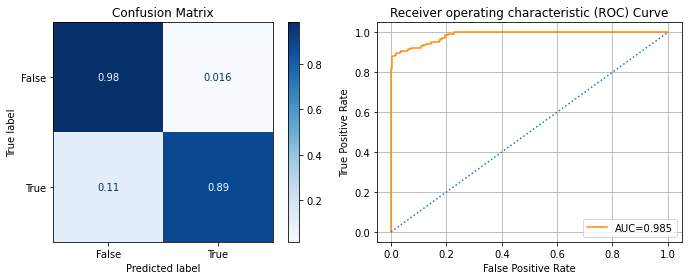

In [305]:
#LET'S SEE HOW OUR GRIDSEARCH MODEL DOES ON THE TEST DATA!

model_assessment(rf_grid_search, X_test, y_test)

> **WOW!! We had a huge improvement in Recall score! GridSearch found the best parameters to predict whether a customer is going to cancel their account with SyriaTel.**

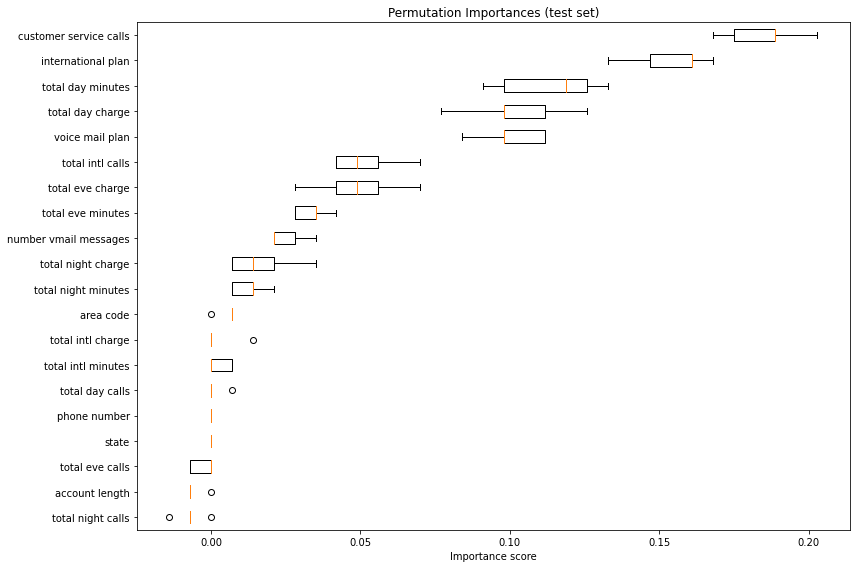

In [284]:
#LET'S LOOK AT PERMUTATION IMPORTANCE TO SEE WHICH FEATURES WERE MOST HEAVILY RELIED ON IN MODELING PROCESS
#Citation: https://scikit-learn.org/stable/auto_examples/inspection/plot_permutation_importance.html#sphx-glr-auto-examples-inspection-plot-permutation-importance-py

from sklearn.inspection import permutation_importance

result = permutation_importance(rf_grid_search, X_test, y_test)

sorted_idx = result.importances_mean.argsort()

fig, ax = plt.subplots(figsize=(12,8))
ax.boxplot(result.importances[sorted_idx].T,
           vert=False, labels=X_test.columns[sorted_idx])
ax.set_title("Permutation Importances (test set)")
ax.set_xlabel("Importance score")
fig.tight_layout()
plt.show()


> - **Permutation importance overcomes one of the major issues with scikit learn's default feature importance function.**

> - **In our case, we have features that experience multicollinearity and vary in their scale (even after pre-processing), which will skew our feature importance results.**

> - **Permutation importance "directly measures variable importance by observing the effect on model accuracy of randomly shuffling each predictor variable" to overcome multicollinearity problems.**

> Citation: https://explained.ai/rf-importance/index.html#5

> - **As we expected from our EDA and domain knowledge, customer service calls were the most heavily weighted feature used by our model to predict customer churn.** 

posx and posy should be finite values
posx and posy should be finite values


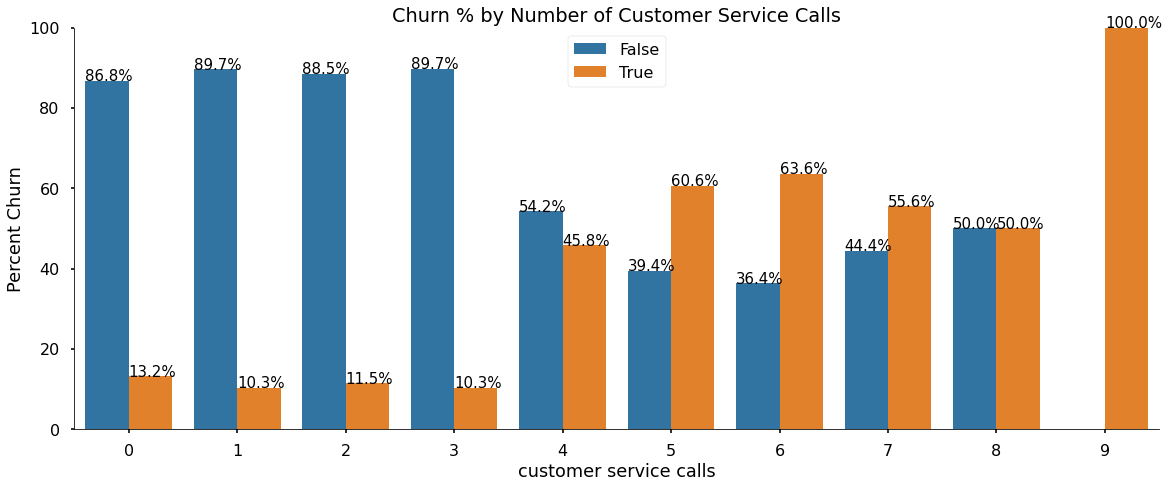

In [301]:
#USE A "WITH" STATEMENT TO TRY OUT DIFFERENT STYLES OF PLOTS
#ONLY THE PLOT INDENTED UNDER THE "WITH" STATEMENT USES THE SEABORN STYLE

with plt.style.context("seaborn-poster"):
    '''Plot customer churn % against number of customer service calls
    #CODE CITATION: https://stackoverflow.com/questions/34615854/seaborn-countplot-with-normalized-y-axis-per-group
    '''
    
    x,y = 'customer service calls', 'churn'

    df1 = df.groupby(x)[y].value_counts(normalize=True)
    df1 = df1.mul(100)
    df1 = df1.rename('Percent Churn').reset_index()

    g = sns.catplot(x=x, y='Percent Churn', hue=y, kind='bar', data=df1, legend_out=False)
    g.fig.set_size_inches(20, 7)
    g.ax.set_title('Churn % by Number of Customer Service Calls')
    g.ax.set_xlabel(x)
    g.ax.set_ylabel('Percent Churn')
    g.ax.legend(loc='upper center')
    g.ax.set_ylim(0,100)


    #PRINT CHURN PERCENTAGE ON CAT PLOT
    for p in g.ax.patches:
        txt = str(p.get_height().round(1)) + '%'
        txt_x = p.get_x() 
        txt_y = p.get_height()
        g.ax.text(txt_x, txt_y, txt, fontdict={'fontsize': 15})

# CONCLUSIONS & RECOMMENDATIONS

> - **Our RandomForest model (after using GridSearhCV) can predict customer "churn" with 84% accuracy.**

> - **In this dataset, customers who had more than 3 calls to customer service were statistically the most likely to cancel their contracts with SyriaTel.**

**Business recommendations:**

> 1. Focus on improving customer satisfaction. It's clear (and not surprising) that customers with more calls to customer service would cancel their contracts. Ensure account executives are actively tracking customers with 3 or more calls to customer service calls, and set-aside more time to trouble-shoot issues directly with their accounts.
 

> 2. Build a **company-wide data aggregator and visualization dashboard** that continuously tracks the customer accounts with the voice mail plan, the highest evening/night phone usage, and number of calls to customer service. This would allow SyriaTel senior management to track the customers with the highest probability of canceling their contracts and facilitate new strategy development for the Customer Success department. 

> 3. Reach out to the customers who canceled their contract and ask them why they left SyriaTel. Use these responses to formulate a new approach to how SyriaTel approaches Customer Success. 

## FUTURE WORK

> - **Explore using boosting algorithms such as XGBoost to increase Recall score.**

> - **Use a larger dataset from more area codes to get a larger sampling of SyriaTel's customer base to get a better picture of company-wide customer churn.**

> - **Incorporate customer cancellation feedback into the dataset to identify the actual underlying reasons for customer churn.** 